In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/translated-data-english-validation/translated_data_english_validation.tsv
/kaggle/input/translated-data-english/translated_data_english.tsv
/kaggle/input/translated-data-english-test/translated_data_english_test.tsv


In [2]:
import nltk
# The NLTK data package includes a pre-trained Punkt tokenizer for English.
# punkt had to be manually downloaded using the command below
# same with stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
train = pd.read_csv('/kaggle/input/translated-data-english/translated_data_english.tsv', sep='\t')
validation = pd.read_csv('/kaggle/input/translated-data-english-validation/translated_data_english_validation.tsv', sep='\t')
test = pd.read_csv('/kaggle/input/translated-data-english-test/translated_data_english_test.tsv', sep='\t')

In [4]:
train.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affilation,count_1,count_2,count_3,count_4,count_5,context,statement_removedpunctuation,nepali_translation,english_translation
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,When did the decline of coal start It started ...,कोइलाको पतन कहिले सुरु भयो यो प्राकृतिक ग्यास ...,When did the decline of coal begin? It began w...
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Hillary Clinton agrees with John McCain by vot...,हिलारी क्लिन्टनले जर्ज बुशलाई इरानमा शंकाको फा...,Hillary Clinton agreed with John McCain by vot...
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,Health care reform legislation is likely to ma...,स्वास्थ्य हेरचाह सुधार कानूनले नि: शुल्क लिंग ...,Health care reform legislation is likely to ma...
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,The economic turnaround started at the end of ...,मेरो कार्यकालको अन्त्यमा आर्थिक परिवर्तन सुरु भयो,"Towards the end of my tenure, the economic tra..."
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,The Chicago Bears have had more starting quart...,शिकागो बियर्सले विगत दुई दशकहरूमा बर्खास्त गरि...,The Chicago Bears have had more starting quart...


In [5]:
train['english_translation'] = train['english_translation'].str.lower()
validation['english_translation'] = validation['english_translation'].str.lower()
test['english_translation'] = test['english_translation'].str.lower()


In [6]:
validation.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affilation,count_1,count_2,count_3,count_4,count_5,context,statement_removedpunctuation,nepali_translation,english_translation
0,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,When Obama was sworn into office he DID NOT us...,ओबामाले पदमा सपथ लिँदा उनले पवित्र बाइबल प्रयो...,when obama took the oath of office he did not ...
1,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,Says Having organizations parading as being so...,"भन्छन्, ‘समाज कल्याणकारी संस्था भई परेड गर्ने ...","he says, 'when the society parades as a welfar..."
2,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,Says nearly half of Oregons children are poor,ओरेगनका झण्डै आधा बालबालिका गरिब रहेको बताउँछन्,nearly half of oregon's children say they are ...
3,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,On attacks by Republicans that various program...,रिपब्लिकनहरूको आक्रमणमा कि आर्थिक प्रोत्साहन य...,republicans attack that the various programs i...
4,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H.",Says when armed civilians stop mass shootings ...,भन्छन् जब सशस्त्र नागरिकहरूले बन्दुकको साथ साम...,says when armed citizens stop mass shootings w...


In [7]:
import string
def removepunctuation(sentence):
   new_text = sentence.replace("—", " ") # "—" in the text was not equivalent to "-" so we replcaed "—" with a space
   print 
  #iterate over every single character to see if it is a punctuation or not, and then concatenate them using "join"
   punctuationfree="".join([i for i in new_text if i not in string.punctuation])
   return punctuationfree

In [8]:
train["statement_removedpunctuation"] = train['english_translation'].apply(lambda x : removepunctuation(x))
validation["statement_removedpunctuation"] = validation['english_translation'].apply(lambda x : removepunctuation(x))
test["statement_removedpunctuation"] = test['english_translation'].apply(lambda x : removepunctuation(x))

In [9]:
test.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affilation,count_1,count_2,count_3,count_4,count_5,context,statement_removedpunctuation,nepali_translation,english_translation
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin is on pace to double the number of l...,विस्कॉन्सिन यस वर्ष छटाउने संख्या दोब्बर गर्न ...,wisconsin is on pace to double the number of l...
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,john mccain said nothing was done to help vets,जोन म्याककेनले पशु चिकित्सकहरूलाई मद्दत गर्न क...,john mccain said nothing was done to help vets
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici supports plan to cut medicare...,Suzanne Bonamici ले मेडिकेयर एडभान्टेज वरिष्ठह...,suzanne bonamici supports plan to cut medicare...
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,when a reporter asked if he was at the center ...,जब एक रिपोर्टरले सोध्यो कि उनी अभियान कानूनको ...,when a reporter asked if he was at the center ...
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website,in the last five years the federal government ...,विगत पाँच वर्षमा सङ्घीय सरकारले दिवंगत पूर्व स...,"in the last five years, the federal government..."


In [10]:
train["english_translation_tokenized"] = train["statement_removedpunctuation"].apply(word_tokenize)
validation["english_translation_tokenized"] = validation["statement_removedpunctuation"].apply(word_tokenize)
test["english_translation_tokenized"] = test["statement_removedpunctuation"].apply(word_tokenize)

In [11]:
train.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affilation,count_1,count_2,count_3,count_4,count_5,context,statement_removedpunctuation,nepali_translation,english_translation,english_translation_tokenized
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,when did the decline of coal begin it began wi...,कोइलाको पतन कहिले सुरु भयो यो प्राकृतिक ग्यास ...,when did the decline of coal begin? it began w...,"[when, did, the, decline, of, coal, begin, it,..."
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agreed with john mccain by vot...,हिलारी क्लिन्टनले जर्ज बुशलाई इरानमा शंकाको फा...,hillary clinton agreed with john mccain by vot...,"[hillary, clinton, agreed, with, john, mccain,..."
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legislation is likely to ma...,स्वास्थ्य हेरचाह सुधार कानूनले नि: शुल्क लिंग ...,health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely..."
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,towards the end of my tenure the economic tran...,मेरो कार्यकालको अन्त्यमा आर्थिक परिवर्तन सुरु भयो,"towards the end of my tenure, the economic tra...","[towards, the, end, of, my, tenure, the, econo..."
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,the chicago bears have had more starting quart...,शिकागो बियर्सले विगत दुई दशकहरूमा बर्खास्त गरि...,the chicago bears have had more starting quart...,"[the, chicago, bears, have, had, more, startin..."


In [12]:
train["english_translation_tokenized"].iloc[7]

['however',
 'it',
 'took',
 'one',
 'hundred',
 'and',
 'ninetyfive',
 'million',
 'in',
 'oregon',
 'lottery',
 'funds',
 'for',
 'the',
 'port',
 'of',
 'newport',
 'to',
 'finally',
 'land',
 'the',
 'new',
 'noaa',
 'marine',
 'operations',
 'center',
 'in',
 'the',
 'pacific']

In [13]:
stop_words = stopwords.words('english')

In [14]:
def stopwordremoval(words):
    preprocessed_tokens = []
    for i in words:
        # Remove stopwords and empty strings while keeping words separated by space
        post_removal = [word for word in i.split() if word.lower() not in stop_words]
        filtered_string = " ".join(post_removal).strip()
        if filtered_string:
            preprocessed_tokens.append(filtered_string)
    # Combine the preprocessed tokens into a single string
    combined_string = " ".join(preprocessed_tokens)
    return combined_string

In [15]:
stopwordremoval(['however',
 'it',
 'took',
 'one',
 'hundred',
 'and',
 'ninetyfive',
 'million',
 'in',
 'oregon',
 'lottery',
 'funds',
 'for',
 'the',
 'port',
 'of',
 'newport',
 'to',
 'finally',
 'land',
 'the',
 'new',
 'noaa',
 'marine',
 'operations',
 'center',
 'in',
 'the',
 'pacific'])

'however took one hundred ninetyfive million oregon lottery funds port newport finally land new noaa marine operations center pacific'

In [16]:
train["english_translation_stopwords"] = train["english_translation_tokenized"].apply(stopwordremoval)
validation["english_translation_stopwords"] = validation["english_translation_tokenized"].apply(stopwordremoval)
test["english_translation_stopwords"] = test["english_translation_tokenized"].apply(stopwordremoval)

In [17]:
test.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affilation,count_1,count_2,count_3,count_4,count_5,context,statement_removedpunctuation,nepali_translation,english_translation,english_translation_tokenized,english_translation_stopwords
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin is on pace to double the number of l...,विस्कॉन्सिन यस वर्ष छटाउने संख्या दोब्बर गर्न ...,wisconsin is on pace to double the number of l...,"[wisconsin, is, on, pace, to, double, the, num...",wisconsin pace double number layoffs year
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,john mccain said nothing was done to help vets,जोन म्याककेनले पशु चिकित्सकहरूलाई मद्दत गर्न क...,john mccain said nothing was done to help vets,"[john, mccain, said, nothing, was, done, to, h...",john mccain said nothing done help vets
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici supports plan to cut medicare...,Suzanne Bonamici ले मेडिकेयर एडभान्टेज वरिष्ठह...,suzanne bonamici supports plan to cut medicare...,"[suzanne, bonamici, supports, plan, to, cut, m...",suzanne bonamici supports plan cut medicare ad...
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,when a reporter asked if he was at the center ...,जब एक रिपोर्टरले सोध्यो कि उनी अभियान कानूनको ...,when a reporter asked if he was at the center ...,"[when, a, reporter, asked, if, he, was, at, th...",reporter asked center criminal scheme violate ...
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website,in the last five years the federal government ...,विगत पाँच वर्षमा सङ्घीय सरकारले दिवंगत पूर्व स...,"in the last five years, the federal government...","[in, the, last, five, years, the, federal, gov...",last five years federal government provided 61...


In [18]:
train["statement_removedpunctuation"].iloc[200]

'over the past year more than twenty percent of americans have changed their minds about the war in afghanistan concluding that we shouldnt be there'

In [19]:
train["english_translation_stopwords"].iloc[200]

'past year twenty percent americans changed minds war afghanistan concluding shouldnt'

In [20]:
import spacy

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [21]:
nlp = spacy.load("en_core_web_sm")


In [22]:
def lemmetization(text):
    doc = nlp(text)
    lemmetized = []
    for token in doc:
        lemmetized.append(token.lemma_)
    return " ".join(lemmetized)


In [23]:
train["preprocessed_english"] = train["english_translation_stopwords"].apply(lemmetization)
validation["preprocessed_english"] = validation["english_translation_stopwords"].apply(lemmetization)
test["preprocessed_english"] = test["english_translation_stopwords"].apply(lemmetization)

In [24]:
train.value_counts('label')

label
half-true      2114
false          1993
mostly-true    1961
true           1675
barely-true    1654
pants-fire      839
dtype: int64

In [25]:
train.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affilation,count_1,count_2,count_3,count_4,count_5,context,statement_removedpunctuation,nepali_translation,english_translation,english_translation_tokenized,english_translation_stopwords,preprocessed_english
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,when did the decline of coal begin it began wi...,कोइलाको पतन कहिले सुरु भयो यो प्राकृतिक ग्यास ...,when did the decline of coal begin? it began w...,"[when, did, the, decline, of, coal, begin, it,...",decline coal begin began natural gas layoff be...,decline coal begin begin natural gas layoff be...
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agreed with john mccain by vot...,हिलारी क्लिन्टनले जर्ज बुशलाई इरानमा शंकाको फा...,hillary clinton agreed with john mccain by vot...,"[hillary, clinton, agreed, with, john, mccain,...",hillary clinton agreed john mccain voting give...,hillary clinton agree john mccain voting give ...
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legislation is likely to ma...,स्वास्थ्य हेरचाह सुधार कानूनले नि: शुल्क लिंग ...,health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely...",health care reform legislation likely mandate ...,health care reform legislation likely mandate ...
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,towards the end of my tenure the economic tran...,मेरो कार्यकालको अन्त्यमा आर्थिक परिवर्तन सुरु भयो,"towards the end of my tenure, the economic tra...","[towards, the, end, of, my, tenure, the, econo...",towards end tenure economic transformation began,towards end tenure economic transformation begin
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,the chicago bears have had more starting quart...,शिकागो बियर्सले विगत दुई दशकहरूमा बर्खास्त गरि...,the chicago bears have had more starting quart...,"[the, chicago, bears, have, had, more, startin...",chicago bears starting quarterbacks past ten y...,chicago bear start quarterback past ten year t...


In [26]:
train["preprocessed_english"].iloc[0]

'decline coal begin begin natural gas layoff begin administration president george w bush'

In [27]:
# print(X.toarray())

In [28]:
train.isnull().sum()

id                                  0
label                               0
statement                           0
subjects                            2
speaker                             2
speaker_job_title                2895
state_info                       2208
party_affilation                    2
count_1                             2
count_2                             2
count_3                             2
count_4                             2
count_5                             2
context                           102
statement_removedpunctuation        0
nepali_translation                  0
english_translation                 0
english_translation_tokenized       0
english_translation_stopwords       0
preprocessed_english                0
dtype: int64

In [29]:
train.dropna(subset=['subjects', 'speaker','party_affilation'], inplace=True)
train.dropna(subset=['context'], inplace=True)

In [30]:
validation.dropna(subset=['subjects', 'speaker','party_affilation'], inplace=True)
validation.dropna(subset=['context'], inplace=True)

In [31]:
test.dropna(subset=['subjects', 'speaker','party_affilation'], inplace=True)
test.dropna(subset=['context'], inplace=True)

In [32]:
train.shape

(10134, 20)

In [33]:
train.isnull().sum()

id                                  0
label                               0
statement                           0
subjects                            0
speaker                             0
speaker_job_title                2864
state_info                       2183
party_affilation                    0
count_1                             0
count_2                             0
count_3                             0
count_4                             0
count_5                             0
context                             0
statement_removedpunctuation        0
nepali_translation                  0
english_translation                 0
english_translation_tokenized       0
english_translation_stopwords       0
preprocessed_english                0
dtype: int64

In [34]:
train.value_counts('label')

label
half-true      2097
false          1970
mostly-true    1944
true           1655
barely-true    1640
pants-fire      828
dtype: int64

In [35]:
train.replace(to_replace=["true", "mostly-true"],
           value="true", inplace=True)
train.replace(to_replace=["false", "pants-fire"],
           value="false", inplace=True)
train.replace(to_replace=["half-true", "barely-true"],
           value="vague", inplace=True)

In [36]:
train.value_counts('label')

label
vague    3737
true     3599
false    2798
dtype: int64

In [37]:
validation.replace(to_replace=["true", "mostly-true"],
           value="true", inplace=True)
validation.replace(to_replace=["false", "pants-fire"],
           value="false", inplace=True)
validation.replace(to_replace=["half-true", "barely-true"],
           value="vague", inplace=True)
validation.value_counts('label')

label
vague    480
true     416
false    375
dtype: int64

In [38]:
test.replace(to_replace=["true", "mostly-true"],
           value="true", inplace=True)
test.replace(to_replace=["false", "pants-fire"],
           value="false", inplace=True)
test.replace(to_replace=["half-true", "barely-true"],
           value="vague", inplace=True)
test.value_counts('label')

label
vague    470
true     440
false    336
dtype: int64

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional, Input, Concatenate, TimeDistributed
from tensorflow.keras.utils import plot_model

In [40]:
import tensorflow as tf

In [41]:
vectorizer = TfidfVectorizer(lowercase = False)

In [42]:
features_train = train['preprocessed_english']
target_train = train['label'] 
features_valid = validation['preprocessed_english']
target_valid = validation['label'] 
features_test = test['preprocessed_english']
target_test = test['label'] 

In [43]:
X_train= vectorizer.fit_transform(features_train)
X_valid=vectorizer.transform(features_valid)
X_test=vectorizer.transform(features_test)

In [44]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [45]:
import scipy.sparse as sp

# Sort the indices of the sparse matrix
X_train.sort_indices()
X_valid.sort_indices()
X_test.sort_indices()

In [46]:
y_train=target_train
y_valid=target_valid
y_test=target_test

In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)
y_test = label_encoder.transform(y_test)

In [48]:
y_train

array([2, 1, 0, ..., 2, 0, 0])

In [49]:
X_train

<10134x9565 sparse matrix of type '<class 'numpy.float64'>'
	with 103935 stored elements in Compressed Sparse Row format>

In [50]:
# X_train=X_train.toarray()
# X_valid=X_valid.toarray()
# X_test=X_test.toarray()

In [51]:
X_valid.shape

(1271, 9565)

In [52]:
y_train.shape

(10134,)

In [53]:
X_valid.shape

(1271, 9565)

In [54]:
# X_train, X_test, y_train, y_test = train_test_split(features_transformed, target, test_size=0.2, random_state=42)

In [55]:
type(X_train)


scipy.sparse._csr.csr_matrix

In [56]:
type(y_train)

numpy.ndarray

In [57]:
vocab_size = 5000

In [58]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=X_train.shape[1]))  # Embedding layer
model.add(Dropout(rate=0.4))
model.add(LSTM(units=4))
model.add(Dropout(rate=0.4))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=3, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 9565, 128)         640000    
                                                                 
 dropout (Dropout)           (None, 9565, 128)         0         
                                                                 
 lstm (LSTM)                 (None, 4)                 2128      
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 100)               500       
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 3

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


In [60]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 5
)

Epoch 1/5
317/317 [==============================] - 112s 328ms/step - loss: 1.0926 - accuracy: 0.3634 - val_loss: 1.0956 - val_accuracy: 0.3777
Epoch 2/5
317/317 [==============================] - 102s 322ms/step - loss: 1.0916 - accuracy: 0.3666 - val_loss: 1.0956 - val_accuracy: 0.3777
Epoch 3/5
317/317 [==============================] - 103s 324ms/step - loss: 1.0916 - accuracy: 0.3623 - val_loss: 1.0947 - val_accuracy: 0.3777
Epoch 4/5
317/317 [==============================] - 103s 324ms/step - loss: 1.0917 - accuracy: 0.3714 - val_loss: 1.0958 - val_accuracy: 0.3777
Epoch 5/5
317/317 [==============================] - 104s 329ms/step - loss: 1.0914 - accuracy: 0.3620 - val_loss: 1.0954 - val_accuracy: 0.3777


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
def plot_history(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

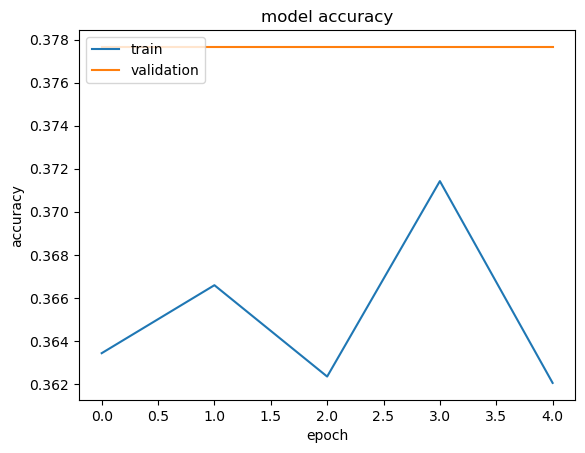

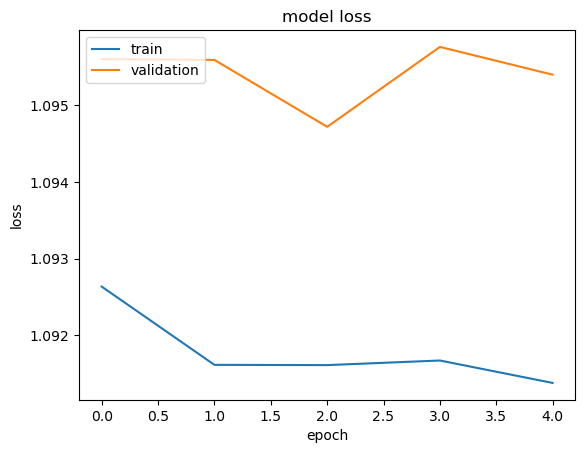

In [63]:
plot_history(history)

In [64]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)
     

39/39 [==============================] - 5s 114ms/step - loss: 1.0897 - accuracy: 0.3772
Test score: 1.0896501541137695
Test accuracy: 0.37720707058906555


In [65]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

39/39 [==============================] - 5s 108ms/step


In [66]:
print(classification_report(y_true=y_test, y_pred=y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00       336
           1       1.00      0.00      0.00       440
           2       0.38      1.00      0.55       470

    accuracy                           0.38      1246
   macro avg       0.79      0.33      0.18      1246
weighted avg       0.77      0.38      0.21      1246



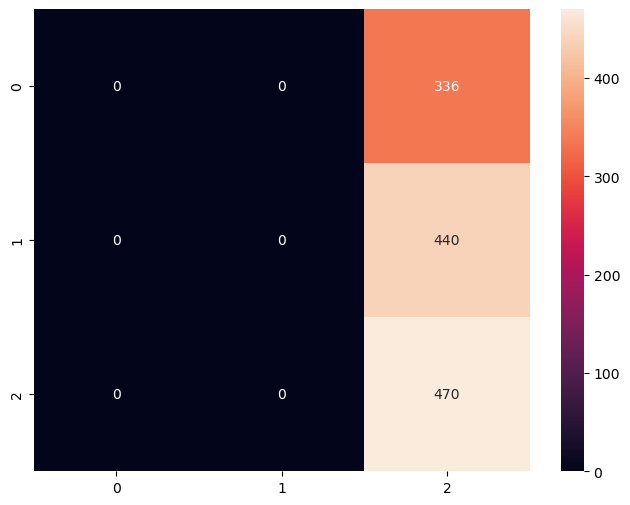

In [67]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()